# Code for article by Fabio Sigrist in towards datascience. #
### Article: 
"Demystifying ROC and precision-recall curves <br>
Debunking some myths about the ROC curve / AUC and the precision-recall curve / AUPRC for binary classification with a focus on imbalanced data"<br>
<br>
[URL: https://towardsdatascience.com/demystifying-roc-and-precision-recall-curves-d30f3fad2cbf]

### My Comment on the Code:
In this code we compare two different classifiers for two different data-sets - how usefull is that? Isn't the point <br>
of all the discussion to provide a means to compare two different classifiers for one and the same data-set? <br>

freq. 1's = 0.01, #1's in test: 10027, #1's in train: 9973


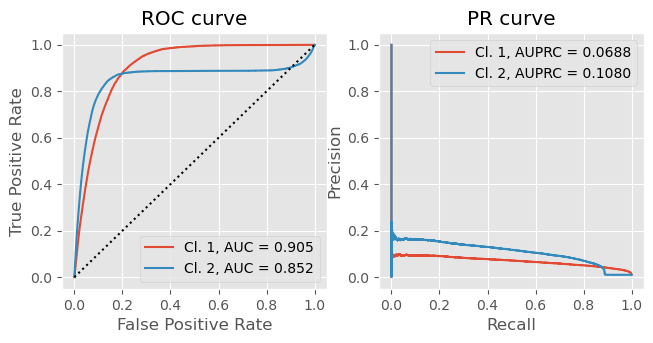

In [45]:
# -*- coding: utf-8 -*-
"""
A comparison of ROC and precision-recall curves for imbalanced data

Author: Fabio Sigrist
Date: 25.01.2022
"""


import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy import stats
plt.style.use('ggplot')

ntrain = 1000000
ntest = 1000000
ntot = ntrain + ntest
# Simulate data
np.random.seed(100)
X = np.random.rand(ntot, 3) - 0.5 # uniformly distributed values between -0.5 and +0.5
X[:, 2] = X[:, 1] * X[:, 1] 

# data are "easy" or "difficult":
data = "easy" 
#data = "difficult"
if data == "easy":
    p = stats.norm.cdf(0.1 * X[:, 1] + X[:, 2] + np.random.normal(scale=0.1, size=ntot)) # "easy" data
else:
    p = stats.norm.cdf(0.1 * X[:, 1] + X[:, 2] + np.random.normal(scale=0.5, size=ntot)) # "difficult" data

frac_ones = 0.01 # fraction of 1s in data
delta = np.quantile(p, q=1-frac_ones)
y = np.multiply(p > delta, 1)

# Split into training and test data
X_train = X[0:ntrain,]
y_train = y[0:ntrain]
X_test = X[ntrain:ntot,]
y_test = y[ntrain:ntot]

print("freq. 1's = "+str(np.mean(y)) +  ", #1's in test: " + str(np.sum(y_test)) + ", #1's in train: " + str(np.sum(y_train)))

# Train models and make predictions
mod_1 = LogisticRegression(penalty='none').fit(X_train[:,(0,2)], y_train) # this model is trained to fit on the 0'th and 2nd column
pred_1 = mod_1.predict_proba(X_test[:,(0,2)])[:,1] # predict on the 0'th and 2nd column
mod_2 = LogisticRegression(penalty='none').fit(X_train[:,(0,1)], y_train) # this model is trained to fit on the 0'th and 1st column
pred_2 = mod_2.predict_proba(X_test[:,(0,1)])[:,1] # predict on the 0'th and 1st column

# so in the end we compare two different classifiers for two different data-sets - how usefull is that? Isn't the point 
# of all the discussion to provide a means to compare two different classifiers for one and the same data-set?

# ROC curve and AUC
fpr_1, tpr_1, threshold = metrics.roc_curve(y_test, pred_1)
auc_1 = metrics.auc(fpr_1, tpr_1)
fpr_2, tpr_2, threshold = metrics.roc_curve(y_test, pred_2)
auc_2 = metrics.auc(fpr_2, tpr_2)

# Precision-recall curve and AUPRC
precision_1, recall_1, thresholds = metrics.precision_recall_curve(y_test, pred_1)
auprc_1 = metrics.auc(recall_1, precision_1)
precision_2, recall_2, thresholds = metrics.precision_recall_curve(y_test, pred_2)
auprc_2 = metrics.auc(recall_2, precision_2)

# Plot results
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(7.5,3.5) )
plt.subplots_adjust(bottom=0.15)

ax[0].set_title('ROC curve')
ax[0].plot(fpr_1, tpr_1, label = 'Cl. 1, AUC = %0.3f' % auc_1)
ax[0].plot(fpr_2, tpr_2, label = 'Cl. 2, AUC = %0.3f' % auc_2)
ax[0].legend(loc = 'lower right')
ax[0].set(ylabel = 'True Positive Rate', xlabel = 'False Positive Rate')
ax[0].plot([0, 1], [0, 1], 'k:')

ax[1].set_title('PR curve')
ax[1].plot(recall_1, precision_1, label = 'Cl. 1, AUPRC = %0.4f' % auprc_1)
ax[1].plot(recall_2, precision_2, label = 'Cl. 2, AUPRC = %0.4f' % auprc_2)
ax[1].legend(loc = 'upper right')
ax[1].set(ylabel = 'Precision', xlabel = 'Recall')

plt.show()
